# Demonstration: VQE algorithm

In [1]:
from PhaseEstimation import vqe, hamiltonians, ising_chain, annni_model

### Ising Chain
$$H = - h \Sigma_i \sigma_z^i - J \Sigma_i \sigma_x^i\sigma_x^{i+1}\qquad\left[J\equiv 1, h \in [0,2*J]\right]$$

In [2]:
# Initialize Hamiltonian class with the desired parameters
# N = number of spins
# J = interaction strenght
# n_states : number of possible different states for h in [0,2*J]
# ring     : if True -> periodic boundary conditions
Hs = hamiltonians.hamiltonian(ising_chain.build_Hs, N = 6, J = 1, n_states = 20, ring = False)

In [3]:
# Initialize VQE class
myvqe = vqe.vqe(Hs, vqe.circuit_ising)

In [4]:
# Train VQE
myvqe.train(lr = .1, n_epochs = 100, circuit = True)

# Train only VQE points which accuracy is higher than a certain threshold (third parameter)
myvqe.train_refine(lr = .1, n_epochs = 100, acc_thr = 0.01, assist = False)

+--- CIRCUIT ---+
0: ──||──H─╭C──RY(0.00)──────────────────────────────────────────||──H─╭C──RY(6.00)──────────
1: ──||──H─╰X─╭C─────────RY(1.00)────────────────────────────────||──H─╰X─╭C─────────RY(7.00)
2: ──||──H────╰X────────╭C─────────RY(2.00)──────────────────────||──H────╰X────────╭C───────
3: ──||──H──────────────╰X────────╭C─────────RY(3.00)────────────||──H──────────────╰X───────
4: ──||──H────────────────────────╰X────────╭C─────────RY(4.00)──||──H───────────────────────
5: ──||──H──────────────────────────────────╰X─────────RY(5.00)──||──H───────────────────────

──────────────────────────────────||──H─╭C──RY(12.00)────────────────────────────────────────────
──────────────────────────────────||──H─╰X─╭C──────────RY(13.00)─────────────────────────────────
───RY(8.00)───────────────────────||──H────╰X─────────╭C──────────RY(14.00)──────────────────────
──╭C─────────RY(9.00)─────────────||──H───────────────╰X─────────╭C──────────RY(15.00)───────────
──╰X────────╭C─────────RY

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

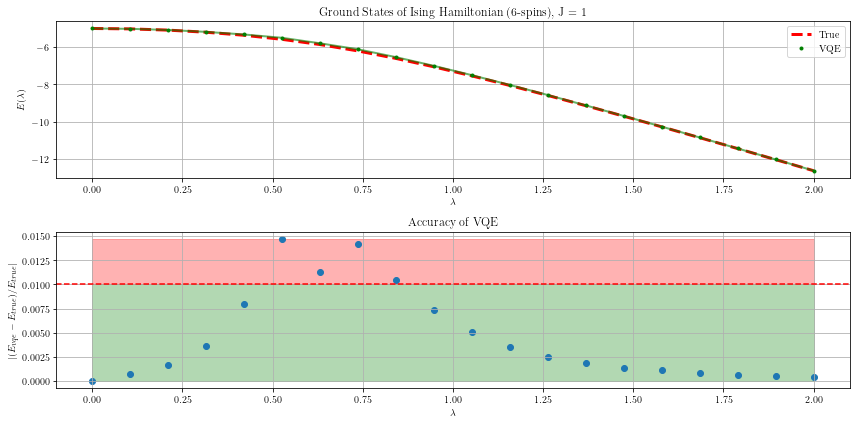

In [5]:
myvqe.show()

### ANNNI Model
$$H = - J_1\left( L \Sigma_i \sigma_z^i + \Sigma_i \sigma_x^i\sigma_x^{i+1} + K \Sigma_i \sigma_x^i\sigma_x^{i+2} \right) \qquad\left[{J_1}\equiv 1, L:=\frac{h}{J_1}, K:= \frac{J_2}{J_1}, L\in[0,2], K = [0, -J1]\right]$$

In [2]:
# Initialize ANNNI Hamiltonian class with the desired parameters
# N = number of spins
# n_states : number of possible values each hyperparameter can have
# ring     : if True -> periodic boundary conditions
Hs = hamiltonians.hamiltonian(annni_model.build_Hs, N = 6, n_hs = 40, n_kappas = 40, h_max = 1.5, kappa_max = 1)

In [3]:
# Initialize VQE class
myvqe = vqe.vqe(Hs, vqe.circuit_ising)

/home/saverio/Desktop/Quantum-Phase-Detection-ANNNI/src/PhaseEstimation/hamiltonians.py:54: UserWarning: True Wavefunction and Groundstate energy levels not found, they will be not computed (this may take a while...)
  warnings.warn("True Wavefunction and Groundstate energy levels not found, they will be not computed (this may take a while...)")


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

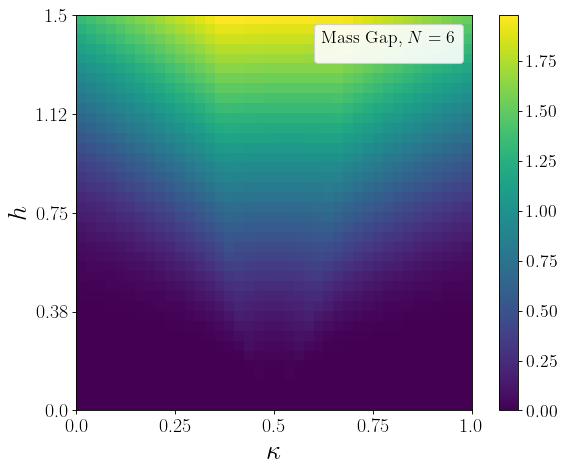

In [4]:
# Show the mass gap (E1 - E0) for the TRUE energy values of the system.
# If those values have not been computed yet, it will compute them
myvqe.Hs.show_massgap()

/home/saverio/anaconda3/lib/python3.9/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning: divide by zero encountered in divide
  res = super().__array_ufunc__(ufunc, method, *args, **kwargs)
/home/saverio/anaconda3/lib/python3.9/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning: invalid value encountered in multiply
  res = super().__array_ufunc__(ufunc, method, *args, **kwargs)


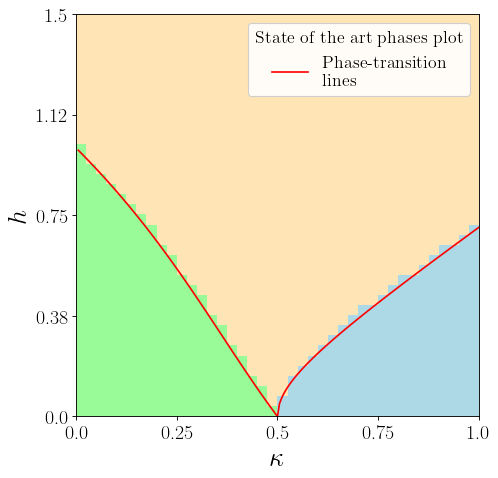

In [5]:
# Just show the "True" Phases, namely those computed using tensor network algorithms
myvqe.Hs.show_phasesplot()

In [6]:
# Train VQE
myvqe.train(lr = .1, n_epochs = 10, circuit = False)

# Train only VQE points which accuracy is higher than a certain threshold (third parameter)
myvqe.train_refine(lr = .1, n_epochs = 100, acc_thr = 0.01, assist = True)

  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

/home/saverio/anaconda3/lib/python3.9/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning:

divide by zero encountered in divide

/home/saverio/anaconda3/lib/python3.9/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning:

invalid value encountered in multiply



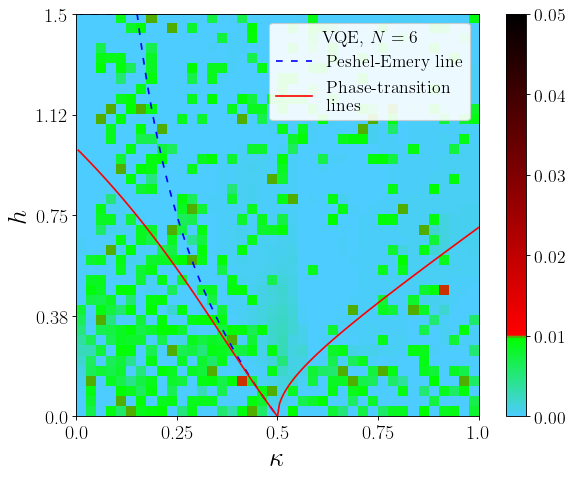

In [7]:
# Show VQE, namely its energies in the parameter space, and its accuracy 
myvqe.show(log_heatmap = False, pe_line = True, phase_lines = True)

<Figure size 640x480 with 0 Axes>

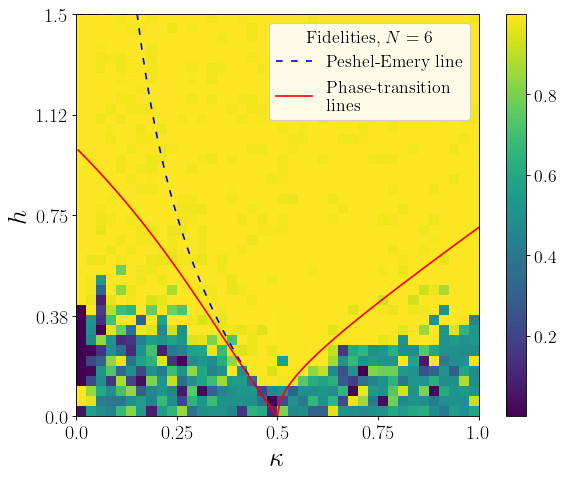

In [8]:
# Show fidelity w.r.t the true states
myvqe.show_fidelity(pe_line = True, phase_lines = True)

/home/saverio/anaconda3/lib/python3.9/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning:

divide by zero encountered in divide

/home/saverio/anaconda3/lib/python3.9/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning:

invalid value encountered in multiply



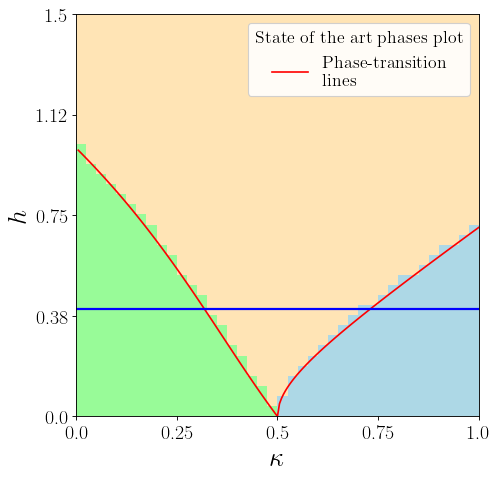

[  10   50   90  130  170  210  250  290  330  370  410  450  490  530
  570  610  650  690  730  770  810  850  890  930  970 1010 1050 1090
 1130 1170 1210 1250 1290 1330 1370 1410 1450 1490 1530 1570]
40


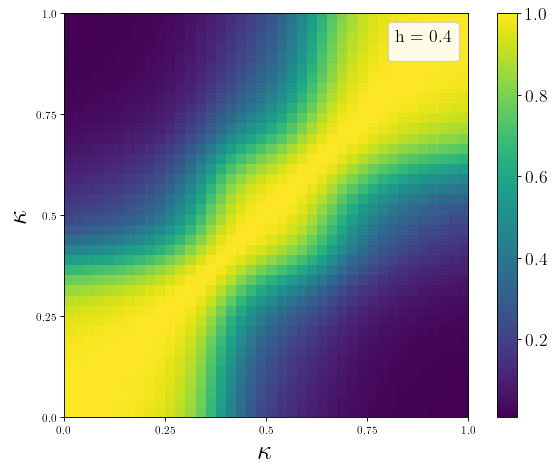

: 

In [10]:
myvqe.show_fidelity_slice(slice_value = .4, axis = 0, truestates = True)